11723번 집합 <span style="color:green">성공</span> - 2025.03.25
 - https://coarmok.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%ACpython-%EB%B0%B1%EC%A4%80-11723%EB%B2%88-%EB%B9%84%ED%8A%B8%EB%A7%88%EC%8A%A4%ED%82%B9

In [ ]:
import sys
# input = sys.stdin.readline

n = int(input())
s = [0 for _ in range(21)]

for _ in range(n):
    command = list(input().split())

    if command[0] == 'add':
        s[int(command[1])] = 1
    elif command[0] == 'remove':
        s[int(command[1])] = 0
    elif command[0] == 'check':
        print(s[int(command[1])])
    elif command[0] == 'toggle':
        s[int(command[1])] = 0 if s[int(command[1])] else 1
    elif command[0] == 'all':
        s = [1 for _ in range(21)]
    elif command[0] == 'empty':
        s = [0 for _ in range(21)]

1182번 부분수열의 합 <span style="color:green">성공</span> - 2025.03.26

In [ ]:
# 부분수열을 뽑는 문제.
# 1. 1~20(max) 까지의 부분 수열(조합)을 모두 뽑으면 시간복잡도가 너무 커진다.
# 2. 따라서 n 크기의 비트마스크를 생성하여 True인 값만 더해주면 된다.
# 3. 이때 값은 True or False 두개임으로 n크기의 중복순열을 만들면 된다.
# 4. 이때 주의할 점으론 모두 False이고 s가 0이라면, ans가 0이 아닐때 -1을 해주어야한다.
# 4-1. 모두 False일 땐 합이 0인데, s가 0이라면 ans += 1 되기 때문
# 4-2. ans가 0이라면 만족하는 부분수열이 없다는 것 때문에 -1을 해주면 안된다.

def dfs(depth):
    global ans

    if depth == n:
        sum = 0
        for i in range(n):
            if mask[i]:
                sum += arr[i]
        if sum == s:
            ans += 1
        return

    for tf in flag:
        mask.append(i)
        dfs(depth + 1)
        mask.pop()

n, s = map(int, input().split())
arr = list(map(int, input().split()))
flag = [False, True]
mask = []
ans = 0

dfs(0)

print(ans - 1 if ans != 0 and s == 0 else ans)

14391번 종이 조각 <span style="color:red">실패</span> - 2025.03.27*
 - 가로로 이어지면 1, 세로로 이어지면 0

 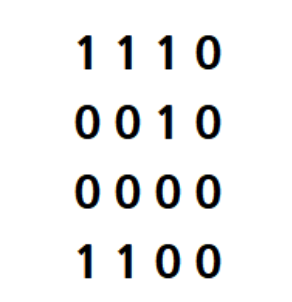

In [ ]:
# https://jemarque.tistory.com/entry/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EB%B9%84%ED%8A%B8%EB%A7%88%EC%8A%A4%ED%82%B9
# https://jemarque.tistory.com/entry/%EB%B0%B1%EC%A4%80python-14391%EB%B2%88-%EC%A2%85%EC%9D%B4%EC%A1%B0%EA%B0%81
# https://lagooni.tistory.com/entry/%EB%B0%B1%EC%A4%80-%EC%A2%85%EC%9D%B4-%EC%A1%B0%EA%B0%81-14391%EB%B2%88-Python-Bitmasking

def solve():
    ans = 0
    # 비트마스크로 경우의 수 모두 따져보기
    for mask in range(1 << (n * m)):
        # print(mask) 0 ~ 2^(n*m) 
        sum = 0
        # 가로 합
        for i in range(n):
            h_sum = 0
            for j in range(m):
                idx = i * m + j # 4, 4 일 때, idx = 0~15
                if mask & (1 << idx) != 0: # 가로일 때
                    h_sum = h_sum * 10 + paper[i][j]
                else: # 세로일 때 초기화
                    sum += h_sum
                    h_sum = 0
            sum += h_sum
        #세로 합
        for j in range(m):
            v_sum = 0
            for i in range(n):
                idx = i * m + j
                if mask & (1 << idx) == 0: # 세로일 때
                    v_sum = v_sum * 10 + paper[i][j]
                else: # 가로 일 때 초기화
                    sum += v_sum
                    v_sum = 0

            sum += v_sum
        ans = max(ans, sum)
    return ans

n, m = map(int, input().split())
paper = [list(map(int, input())) for _ in range(n)]
print(solve())

# 처음 풀이에 대한 반례
# 4 4
# 1000
# 0001
# 0000
# 1000 -> 2010